# Fashion 資料集
* 深度學習 DL: Deep Learning
* 全連接層 FCL: Fully Connected Layer
* 多層神經網路 MLP: Multi-layer Perceptron
```python
import keras
from keras.models import Sequential # 建立MLP
from keras.layers import Dense # MLP套用Dense
from keras.utils.np_utils import to_categorical # 把答案變成one-hot encoding
from sklearn.metrics import confusion_matrix # 運用confusion_matrix查看預測分佈
```

In [1]:
import keras
''' MAC 還要加兩行'''
import ssl
ssl._create_default_https_context=ssl._create_unverified_context
''' MAC'''

Using TensorFlow backend.
/Users/lenotsai/Desktop/0912_機器深度學習/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lenotsai/Desktop/0912_機器深度學習/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lenotsai/Desktop/0912_機器深度學習/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/U

' MAC'

In [2]:
from keras.datasets.fashion_mnist import load_data
load_data()
# ((訓練圖片,訓練答案),(測試圖片,測試答案))

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
# ((訓練題目，訓練答案),(測試題目，測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [18]:
labels = ["T-shirt","Trouser","Pullover",
          "Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

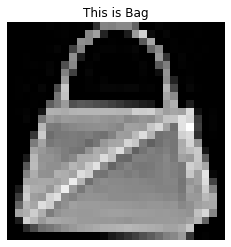

In [20]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0,59999)
plt.title("This is " + labels[y_train[c]])
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [21]:
# input & weight 要相輔相成
# keras & tensorflow 預設輸入為 -1 to 1
# 圖片調整: /255 -> tensorflow weights, reshape -> MLP只吃一維
x_train_reshape = x_train.reshape(60000,784)/255
x_test_reshape = x_test.reshape(10000,784)/255

In [22]:
# 答案調整: One-hot encoding
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("Before: ", y_train[0])
print("After: ", y_train_cat[0])

Before:  9
After:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
mlp = Sequential()
mlp.add(Dense(256, activation="relu", input_dim=784))
# 每個激活函數都會搭配一個bias，把激活點調整回0
# 784*256 weights + 256 bias = 200960 parameters
mlp.add(Dropout(0.25))
mlp.add(Dense(10, activation="softmax"))

# 256*10 weights + 10 bias = 2570 parameters
mlp.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [47]:
# 確定訓練模型的訓練方式...等
# 隨機(隨便選一組weight)梯度(正確方向)下降
# 最後輸出一個神經元：Activation = Sigmoid；Loss = binary_crossentropy(二元交叉熵)
# 最後輸出多個神經元：Activation = Softmax；Loss: categorical_crossentropy(多元交叉熵)
# MSE mean-square error變動太小，不適合用在輸出0~1之間的Loss函數，所以改用entropy
# Optimizer: 下降的時候優化 -> 基於動量(我在走的時候不是等速度，而是有速度的累積)
mlp.compile(loss="categorical_crossentropy", 
            optimizer="adam",
            metrics=["accuracy"])

In [48]:
'''

batch: 看幾筆資料(200)才做一次調整(梯度下降)
資料不大(這裡是28x28)：batch 100~200；資料很大：10~20
epochs: 整份資料(考古題)翻幾次(10)，控制擬合程度
10個epochs, 200 batch: 54000訓練資料*10/batch 200 -> 訓練時調整了2700次
val_loss開始平滑的時候，訓練就可以停止了
validation_split：驗證模型好不好，要用沒看過的資料
verbose=0 -> 完全不印；log  1->印出最仔細的；log 2->只印出validation
我們只看val_loss的改變，它可以看出預測與實際資料的距離
看val_acc會有落差 -> val_acc是二分法，依照“預測與實際資料的距離”直接分為對或錯，
因此沒辦法看出模型準確率的些微差距

'''
mlp.fit(x_train_reshape,
        y_train_cat,
        batch_size=200,
        epochs=10,
        validation_split=0.1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 2s - loss: 0.6064 - acc: 0.7890 - val_loss: 0.4482 - val_acc: 0.8400
Epoch 2/10
 - 2s - loss: 0.4246 - acc: 0.8491 - val_loss: 0.3866 - val_acc: 0.8575
Epoch 3/10
 - 2s - loss: 0.3827 - acc: 0.8626 - val_loss: 0.3577 - val_acc: 0.8710
Epoch 4/10
 - 2s - loss: 0.3547 - acc: 0.8713 - val_loss: 0.3453 - val_acc: 0.8763
Epoch 5/10
 - 2s - loss: 0.3324 - acc: 0.8799 - val_loss: 0.3273 - val_acc: 0.8822
Epoch 6/10
 - 2s - loss: 0.3194 - acc: 0.8843 - val_loss: 0.3232 - val_acc: 0.8833
Epoch 7/10
 - 2s - loss: 0.3064 - acc: 0.8873 - val_loss: 0.3160 - val_acc: 0.8817
Epoch 8/10
 - 2s - loss: 0.2984 - acc: 0.8916 - val_loss: 0.3218 - val_acc: 0.8805
Epoch 9/10
 - 2s - loss: 0.2878 - acc: 0.8954 - val_loss: 0.3047 - val_acc: 0.8880
Epoch 10/10
 - 2s - loss: 0.2822 - acc: 0.8960 - val_loss: 0.3072 - val_acc: 0.8868


In [50]:
mlp.evaluate(x_test_reshape, y_test_cat)
# 結果 [val_loss, val_acc]

10000/10000 [==============================] - 0s 46us/step


[0.3308895756363869, 0.8784]

In [51]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre = mlp.predict_classes(x_test_reshape)
pre

c = [(str(l) + "預測") for l in labels]
i = [(str(l) + "正確") for l in labels]
pd.DataFrame(confusion_matrix(y_test, pre),
            columns=c, index = i)

,T-shirt預測,Trouser預測,Pullover預測,Dress預測,Coat預測,Sandal預測,Shirt預測,Sneaker預測,Bag預測,Ankle boot預測
T-shirt正確,865,1,21,13,3,2,91,0,4,0
Trouser正確,1,973,1,18,4,0,3,0,0,0
Pullover正確,14,0,829,12,71,0,74,0,0,0
Dress正確,33,8,17,892,21,1,25,0,3,0
Coat正確,0,1,124,46,739,0,89,0,1,0
Sandal正確,0,0,0,1,0,967,0,11,1,20
Shirt正確,153,2,101,23,49,1,663,0,8,0
Sneaker正確,0,0,0,0,0,36,0,934,0,30
Bag正確,8,0,8,2,5,4,10,3,960,0
Ankle boot正確,0,0,0,0,0,7,1,30,0,962


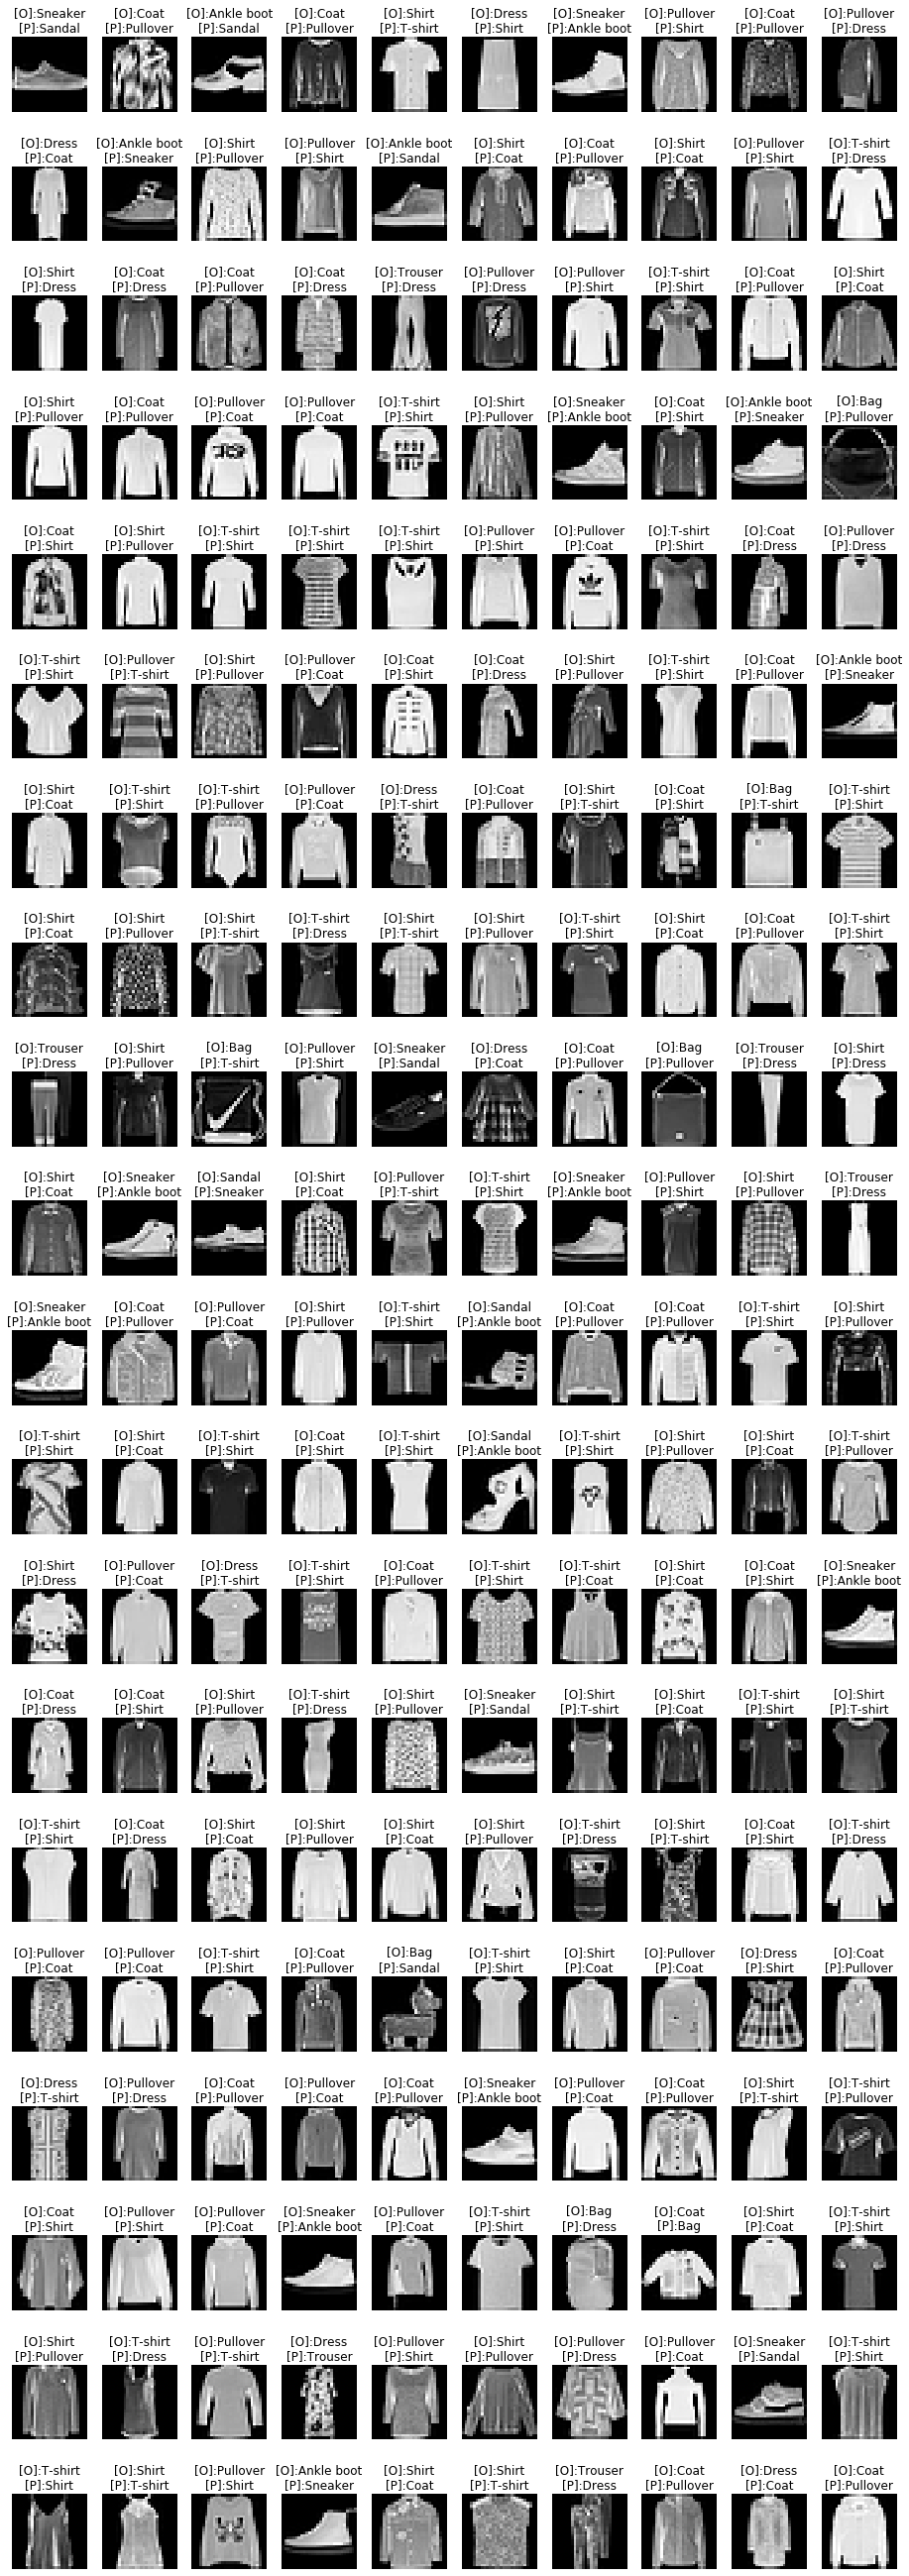

In [33]:
# pre & y_test 都是numpy陣列，才能直接做數字比較
# 找出矩陣中預測錯誤的位置
import numpy as np
# list: list[一個數字]
# numpy array: nparray[[多個數字]]

# pre & y_test兩邊不等處在array中的位置
# 只舉出前200個
idx = np.nonzero(pre != y_test)[0][:200]

# 預測錯誤的圖的原本標籤
false_answer = y_test[idx]

# 預測錯誤的圖的預測標籤
flase_img = pre[idx]

# 把圖拿出來
imgfalse = x_test[idx]

# matplotlib

plt.figure(figsize=(16,50))
# 每一列就是10個
width = 10
height = int(len(imgfalse)/10)+1
for (i,img) in enumerate(imgfalse):
    # (列數、行數、第幾張圖(i開始))
    plt.subplot(height,width, i+1)
    plt.axis("off")
    t = "[O]:" + labels[false_answer[i]] + "\n[P]:" + labels[flase_img[i]]
#     print(t)
    plt.title(t)
    plt.imshow(img, cmap="gray")




In [36]:
mlp.save("fashion_mnist.h5")

In [37]:
from keras.models import load_model
loaded = load_model("fashion_mnist.h5")
mlp.evaluate(x_test_reshape, y_test_cat)
# 結果 [val_loss, val_acc]

10000/10000 [==============================] - 0s 40us/step


[0.34284383739233015, 0.8748]